In [32]:
"""
Python可视化22|Seaborn.catplot(下)-boxenplot|barplot|countplot图
原创 pythonic生物人 pythonic生物人 2020-08-18 20:15
本文介绍Seaborn.catplot中的boxenplot|barplot|countplot图续上篇：Python可视化21|Seaborn.catplot(上)-小提琴图等四类图

7、seaborn.boxenplot（增强箱图）
 不分类增强箱图boxenplot
 分类增强箱图 
 scale参数
 k_depth参数 
8、 seaborn.barplot（条形图或柱状图）
 分类barplot 
 分类水平barplot 
 误差棒属性设置 
 渐变色调色盘 
 所有柱子一个颜色 
 更个性化设置
 多重分类barplot 
 catplot()结合 barplot()和FacetGrid绘制多子图
9、seaborn.countplot（计数图）
 不分类countplot 
 分类countplot 
 catplot()结合countplot和FacetGrid绘制多子图 
"""
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")

iris=datasets.load_iris()
x, y =iris.data,iris.target
y_1 = np.array(['setosa' if i==0 else 'versicolor' if i==1 else 'virginica' for i in y])
pd_iris = pd.DataFrame(np.hstack((x, y_1.reshape(150,1))),columns=['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)','class'])

#astype修改pd_iris中数据类型object为float64
pd_iris['sepal length(cm)']=pd_iris['sepal length(cm)'].astype('float64')
pd_iris['sepal width(cm)']=pd_iris['sepal width(cm)'].astype('float64')
pd_iris['petal length(cm)']=pd_iris['petal length(cm)'].astype('float64')
pd_iris['petal width(cm)']=pd_iris['petal width(cm)'].astype('float64')

pd_iris.head()

,sepal length(cm),sepal width(cm),petal length(cm),petal width(cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot: ylabel='sepal length(cm)'>

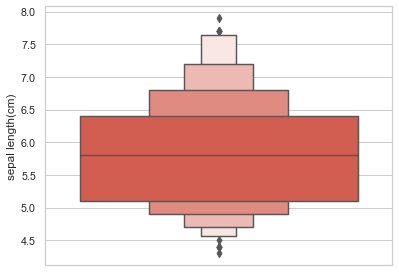

In [14]:
"""
7、seaborn.boxenplot（增强箱图）
该图为boxplot的加强版，提供更多数据的分布信息【箱子更多了】
语法：seaborn.boxenplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, k_depth='proportion', linewidth=None, scale='exponential', outlier_prop=None, showfliers=True, ax=None, **kwargs)
介绍一些特异参数

不分类增强箱图boxenplot
"""
#sepal length(cm)不分类增强箱图boxenplot
plt.figure(dpi=70)
sns.set(style="whitegrid")
sns.boxenplot(y='sepal length(cm)',data=pd_iris,#传入数据pd_iris第一列
              palette=["#e74c3c", "#34495e", "#2ecc71"],
             )

<AxesSubplot: xlabel='class', ylabel='sepal length(cm)'>

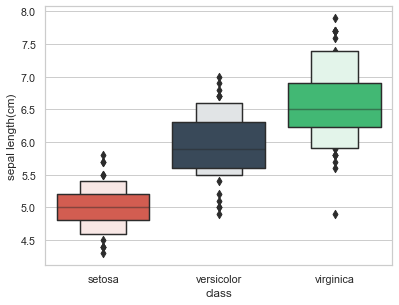

In [15]:
"""
分类增强箱图
"""
#按class分类增强箱图
plt.figure(dpi=70)
sns.set(style="whitegrid")
sns.boxenplot(y='sepal length(cm)',x='class',data=pd_iris,
              palette=["#e74c3c", "#34495e", "#2ecc71"], 
             )

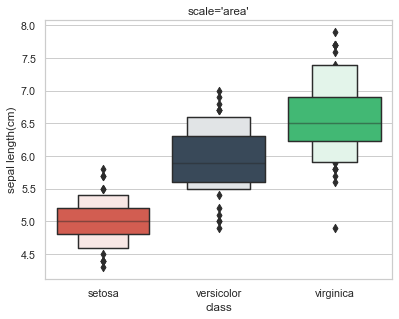

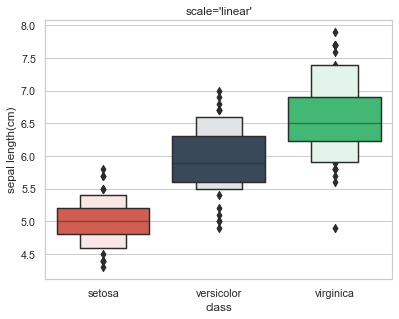

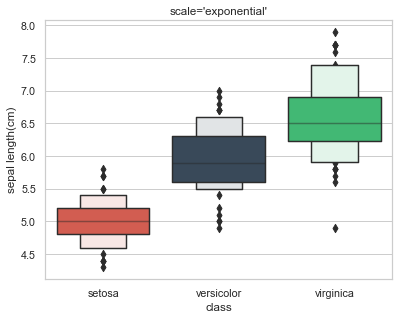

In [16]:
"""
scale参数
即箱子呈现模式，可选linear( reduces the width by a constant linear factor),
exponential（默认,uses the proportion of data not covered）,
area(proportional to the percentage of data covered，和exponential想反)
"""
#scale参数
for i in list('area,linear,exponential'.split(',')):
    plt.figure(dpi=70)
    sns.set(style="whitegrid")
    sns.boxenplot(y='sepal length(cm)',x='class',data=pd_iris,
                   palette=["#e74c3c", "#34495e", "#2ecc71"],
                   scale='%s'%i
                  )
    plt.title("scale='%s'"%i)

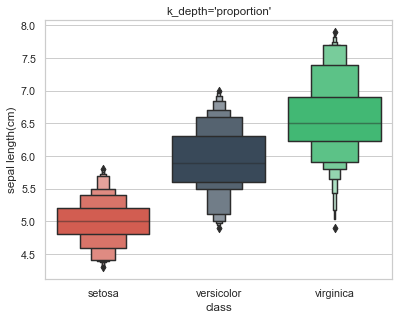

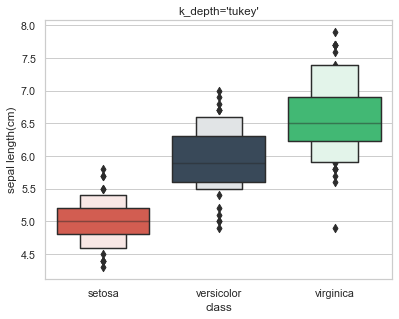

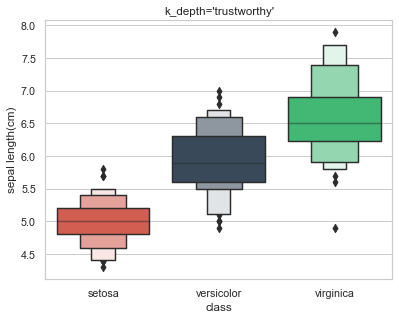

In [17]:
"""
k_depth参数
"""
#k_depth参数
for i in list('proportion,tukey,trustworthy'.split(',')):
    plt.figure(dpi=70)
    sns.set(style="whitegrid")
    sns.boxenplot(y='sepal length(cm)',x='class',data=pd_iris,
                   palette=["#e74c3c", "#34495e", "#2ecc71"],
                   k_depth='%s'%i#箱子数量控制，可选proportion（默认）,tukey,trustworthy
                  )
    plt.title("k_depth='%s'"%i)

<AxesSubplot: xlabel='class', ylabel='sepal length(cm)'>

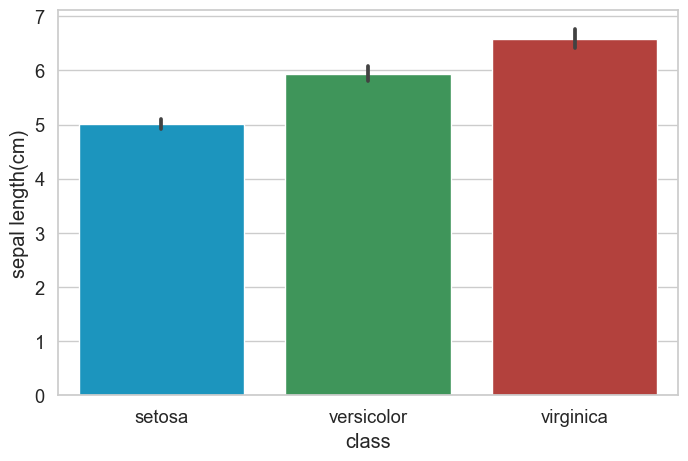

In [18]:
"""
8、 seaborn.barplot（条形图或柱状图）
更基础的更个性化的玩法，参考 ：Python可视化|matplotlib12-垂直|水平|堆积条形图详解语法：
seaborn.barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x105c7d9e0>, 
ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', 
errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)

分类barplot
"""
#按class分类barplot
plt.figure(figsize=(8,5))
sns.set(style="whitegrid",font_scale=1.2)
sns.barplot(y='sepal length(cm)',x='class',data=pd_iris,
              palette=["#01a2d9","#31A354","#c72e29"], 
             )

<AxesSubplot: xlabel='sepal length(cm)', ylabel='class'>

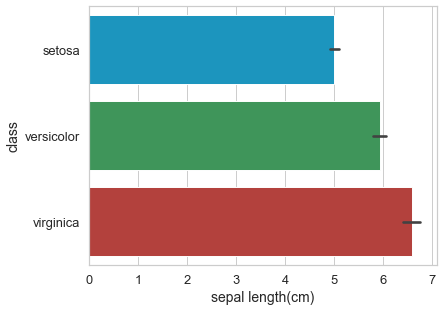

In [20]:
"""
分类水平barplot
"""
#按class分类水平barplot
plt.figure(dpi=70)
sns.set(style="whitegrid",font_scale=1.2)
sns.barplot(x='sepal length(cm)',y='class',data=pd_iris,#将x和y变量换下就可以
              palette=["#01a2d9","#31A354","#c72e29"], 
             )

<AxesSubplot: xlabel='class', ylabel='sepal length(cm)'>

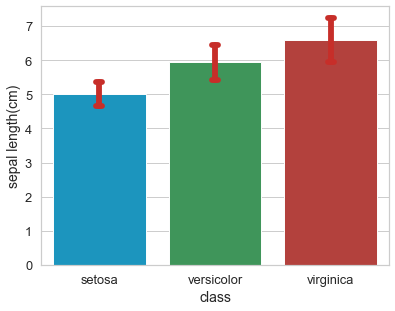

In [21]:
"""
误差棒属性设置
"""
#误差棒属性设置
plt.figure(dpi=70)
sns.set(style="whitegrid",font_scale=1.2)
sns.barplot(y='sepal length(cm)',x='class',data=pd_iris,
              palette=["#01a2d9","#31A354","#c72e29"],
            ci='sd',#设置误差棒的置信区间，可选'sd',float（默认95，即95%置信区间）
            errcolor='#c72e29',#误差棒颜色
            errwidth=6,#误差棒宽度
            capsize=0.05,#误差棒上下横线长度            
        )

<AxesSubplot: xlabel='class', ylabel='sepal length(cm)'>

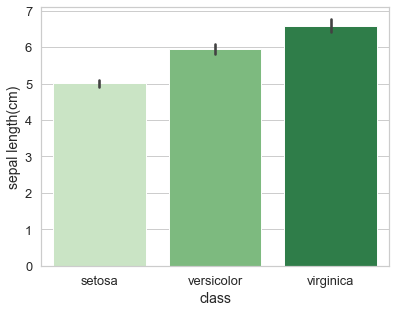

In [22]:
"""
渐变色调色盘
"""
#渐变色调色盘
plt.figure(dpi=70)
sns.set(style="whitegrid",font_scale=1.2)
sns.barplot(y='sepal length(cm)',x='class',data=pd_iris,
              palette='Greens',
             )

<AxesSubplot: xlabel='class', ylabel='sepal length(cm)'>

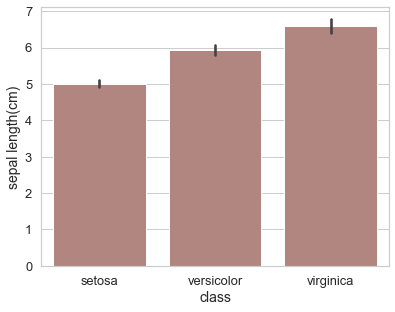

In [23]:
"""
所有柱子一个颜色
"""
#所有柱子一个颜色
plt.figure(dpi=70)
sns.set(style="whitegrid",font_scale=1.2)
sns.barplot(y='sepal length(cm)',x='class',data=pd_iris,
            color='#d5695d',#单独颜色
            saturation=.4,#饱和度
             )

<AxesSubplot: xlabel='class', ylabel='sepal length(cm)'>

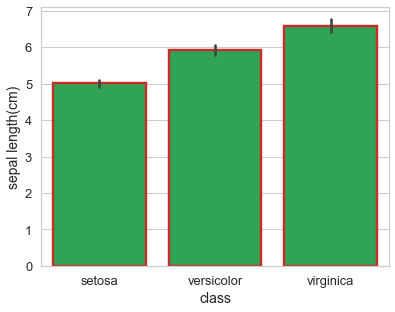

In [25]:
"""
更个性化设置
参考matplotlib.axes.Axes.bar()中参数
"""
#更多参数设置matplotlib.axes.Axes.bar()中参数
plt.figure(dpi=70)
sns.set(style="whitegrid",font_scale=1.2)
sns.barplot(y='sepal length(cm)',x='class',data=pd_iris,
            linewidth=2.5,#柱子外框宽 
            facecolor='#31A354',#柱子填充色
            edgecolor='#c72e29'#柱子外框颜色
             )

<AxesSubplot: xlabel='class', ylabel='sepal length(cm)'>

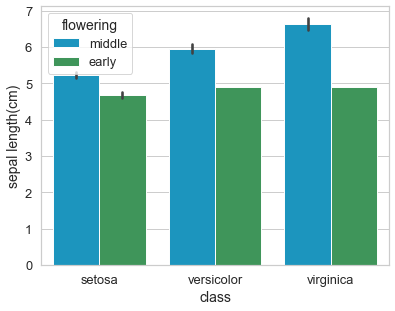

In [33]:
"""
多重分类barplot
"""
#按class分类后再按flowering分类barplot
#给数据加一列花期（上、下旬）
flowering=pd.Series(['early' if i>4.0 and i<5.0 else 'middle' for i in pd_iris['sepal length(cm)']])
pd_iris1=pd.concat([pd_iris,flowering],axis=1)#拼接，默认按行拼接，即axis=0
pd_iris1.rename(columns={0:'flowering'}, inplace = True)#替换列名称

plt.figure(dpi=70)
sns.set(style="whitegrid",font_scale=1.2)
sns.barplot(y='sepal length(cm)',x='class',data=pd_iris1,
              palette=["#01a2d9","#31A354","#c72e29"],
            hue='flowering'
             )

<Figure size 448x336 with 0 Axes>

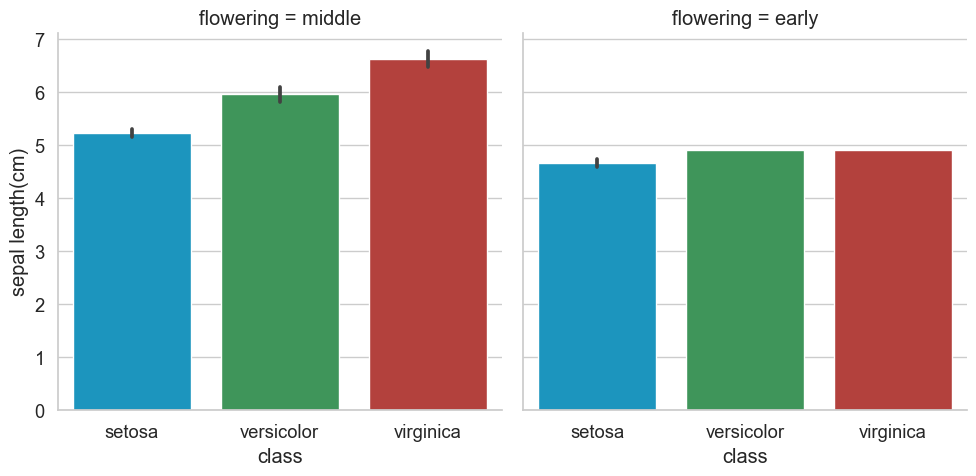

In [34]:
"""
catplot()结合 barplot()和FacetGrid绘制多子图
"""
#使用catplot()结合 barplot()和FacetGrid分图显示
plt.figure(dpi=70)
sns.set(style="whitegrid",font_scale=1.2)
sns.catplot(y='sepal length(cm)',x='class',data=pd_iris1,
            palette=["#01a2d9","#31A354","#c72e29"],
            col='flowering',
            kind='bar',#
             )

<AxesSubplot: xlabel='sepal length(cm)', ylabel='count'>

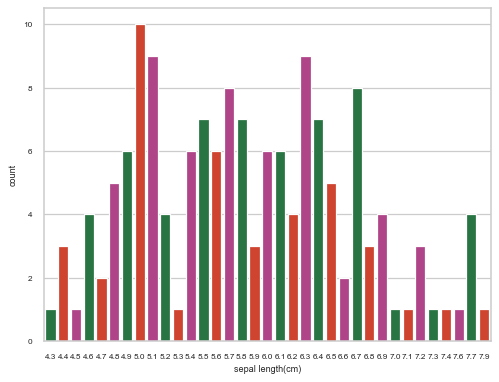

In [39]:
"""
9、seaborn.countplot
seaborn.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)
简单理解为将数据去重，展现每个数据重复conuts数，非常类似barplot()
不分类countplot
"""
#不分类countplot
plt.figure(dpi=90)
sns.set(style="whitegrid",font_scale=0.6)
sns.countplot(x='sepal length(cm)',data=pd_iris1,
              palette=["#1B813E","#E83015","#C1328E"], 
             )

<AxesSubplot: xlabel='sepal length(cm)', ylabel='count'>

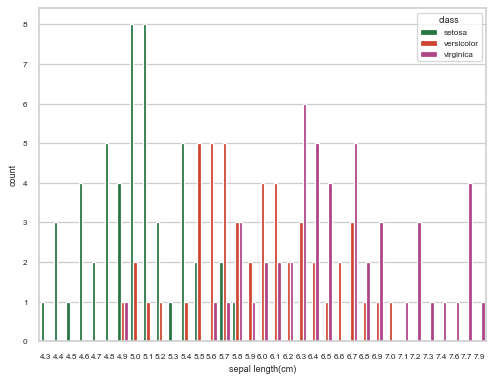

In [41]:
"""
分类countplot
"""
#分类countplot
plt.figure(dpi=90)
sns.set(style="whitegrid",font_scale=0.6)
sns.countplot(x='sepal length(cm)',data=pd_iris1,
              hue='class',#以上每个柱子在按class分三个柱子
              palette=["#1B813E","#E83015","#C1328E"], 
             )

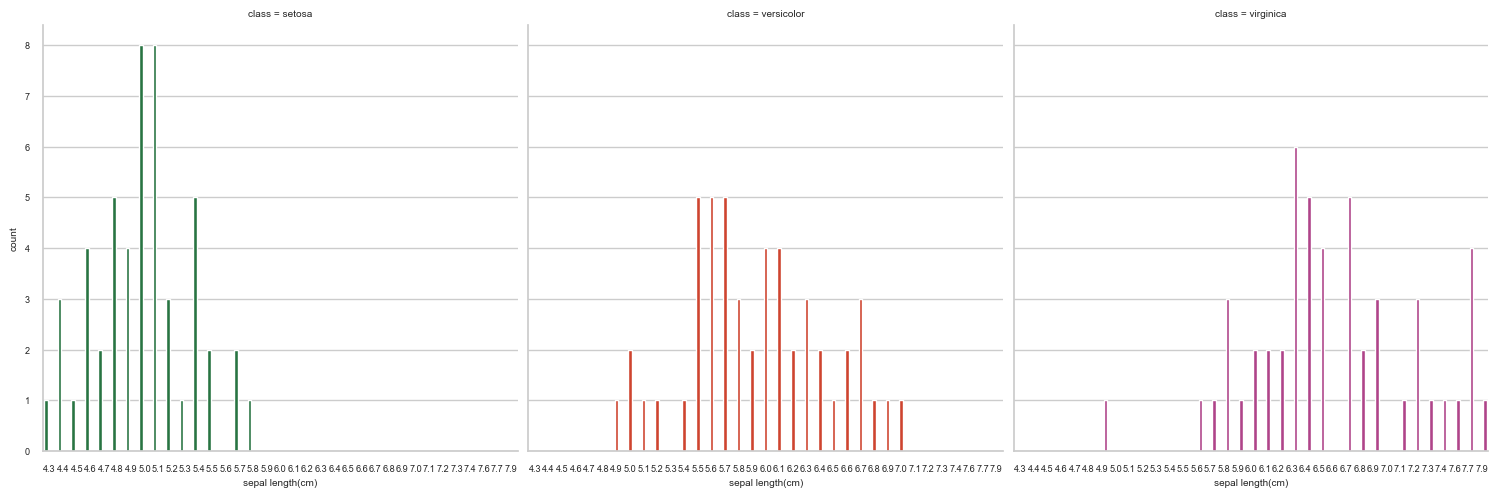

In [43]:
"""
catplot()结合countplot和FacetGrid绘制多子图
"""
#catplot()结合countplot和FacetGrid绘制多子图
#plt.figure(dpi=90)
sns.set(style="whitegrid",font_scale=0.6)
g=sns.catplot(x='sepal length(cm)',data=pd_iris1,
            hue='class',
            col='class',
            kind='count',#切换为countplot
            palette=["#1B813E","#E83015","#C1328E"], 
             )

In [ ]:
"""
参考资料
http://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot
同系列文章
Python可视化21|Seaborn.catplot(上)-小提琴图等四类图
Python可视化|matplotlib13-直方图（histogram）详解
Python可视化matplotlib&seborn14-热图heatmap
Python可视化matplotlib&seborn15-聚类热图clustermap
Python可视化matplotlib&seborn16-相关性heatmap
Python可视化17seborn-箱图boxplot
"""